In [304]:
import math

import numpy as np
h = 6.62606957 * 10**-34
me = 9.10938291 * 10**-31
e = 1.602176565 * 10**-19
Vb = 0.2
Vy = -0.2
hh = h/(2*np.pi)
a = 2 * np.exp(-9)
h

6.62606957e-34

In [305]:
def z(E,V):
    return np.sqrt((E-V)/E+0j)

In [306]:
def k(E,V):
    return np.sqrt(e*2*me*(E-V)+0j)/hh

In [307]:
def tt(E,V):
    return np.tan(k(E,V) * a)

In [308]:
def zi(E,V):
    return complex(1,-z(E,V)*tt(E,V))/complex(1,-(z(E,V)**(-1)) * tt(E,V))

In [309]:
def R(E,V):
    return (1-zi(E,V))/(1+zi(E,V))

In [310]:
def T(E,V):
    return np.sqrt(1-abs(R(E,V))**2)

In [311]:
ff = np.arange(0.001,2,0.03)

In [312]:
Rvec = np.vectorize(R)
Tvec = np.vectorize(T)

In [313]:
Rvals = np.abs(Rvec(ff,Vb))
Tvals = Tvec(ff,Vb)

Ryvals = np.abs(Rvec(ff,Vy))
Tyvals = Tvec(ff,Vy)

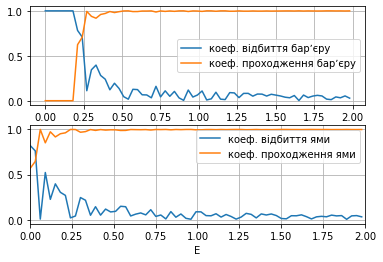

In [314]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(2)
# fig = plt.figure()
# ax = plt.subplot(111)
#
plt.grid(True)

ax1.plot(ff, Rvals, label='коеф. відбиття барʼєру')
ax1.plot(ff, Tvals, label='коеф. проходження барʼєру')
ax1.legend()
ax1.grid()
ax1.set_xlabel('E')
ax2.plot(ff, Ryvals, label='коеф. відбиття ями')
ax2.plot(ff, Tyvals, label='коеф. проходження ями')
ax2.legend()
ax2.set_xlabel('E')
plt.grid(True)
plt.xlim(0,2)
plt.show()

In [315]:
def rezi(E,V):
    return np.real(zi(E,V))

def imzi(E,V):
    return np.imag(zi(E,V))

In [316]:
rezivec = np.vectorize(rezi)
imzivec = np.vectorize(imzi)

In [317]:
fff = np.arange(0.001,1,0.01)
rez_vals = rezivec(fff,Vb)
imz_vals = imzivec(fff,Vb)

rezy_vals = rezivec(fff, Vy)
imzy_vals = imzivec(fff, Vy)

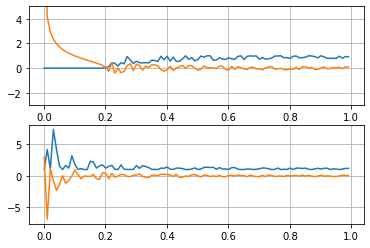

In [320]:
fig2, (ax3,ax4) = plt.subplots(2)
# ax1 = plt.subplot(111)
ax3.plot(fff, rez_vals)
ax3.plot(fff, imz_vals)
ax3.grid()
ax3.set_ylim(-3,5)
ax4.plot(fff, rezy_vals)
ax4.plot(fff, imzy_vals)
ax4.grid()

plt.show()